Methods 7 - Text Analytics
--------------------------

19.3.2020  
Mathematics and Methods in Machine Learning and Neural Networks  
Helsinki Metropolia University of Applied Sciences

The aim of this exercise is to create a visualization for _level of affection_ in different parts of a body of text using NLTK.

We create the functionality and test it as we go, using Obama's inaugural speech. In the end we run a few analyses on different texts.

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

#nltk.download()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
from urllib.parse import urljoin
from urllib.request import urlopen

## Dictionaries

First, let's load dictionaries of __positive and negative__ words.

By looking at the contents of these files, they seem to be geared towards marketing content of the technology age. We'll see how they are suited for analysis of novels or centuries old ceremonial speeches.

In [3]:
def is_comment(s):
    # return true if a line starts with ;
    return s.startswith(';')

def load_words(filename):
    words = []
    with urlopen(filename) as fh:
        for line in fh:
            w = line.decode('utf-8').strip()
            if not is_comment(w):
                if w is not '': words.append(w)
    return words

In [4]:
pos = load_words('http://users.metropolia.fi/~simomake/coursework/ml/positive-words.txt')
print(pos[:50])

['a+', 'abound', 'abounds', 'abundance', 'abundant', 'accessable', 'accessible', 'acclaim', 'acclaimed', 'acclamation', 'accolade', 'accolades', 'accommodative', 'accomodative', 'accomplish', 'accomplished', 'accomplishment', 'accomplishments', 'accurate', 'accurately', 'achievable', 'achievement', 'achievements', 'achievible', 'acumen', 'adaptable', 'adaptive', 'adequate', 'adjustable', 'admirable', 'admirably', 'admiration', 'admire', 'admirer', 'admiring', 'admiringly', 'adorable', 'adore', 'adored', 'adorer', 'adoring', 'adoringly', 'adroit', 'adroitly', 'adulate', 'adulation', 'adulatory', 'advanced', 'advantage', 'advantageous']


In [5]:
neg = load_words('http://users.metropolia.fi/~simomake/coursework/ml/negative-words.txt')
print(neg[:50])

['2-faced', '2-faces', 'abnormal', 'abolish', 'abominable', 'abominably', 'abominate', 'abomination', 'abort', 'aborted', 'aborts', 'abrade', 'abrasive', 'abrupt', 'abruptly', 'abscond', 'absence', 'absent-minded', 'absentee', 'absurd', 'absurdity', 'absurdly', 'absurdness', 'abuse', 'abused', 'abuses', 'abusive', 'abysmal', 'abysmally', 'abyss', 'accidental', 'accost', 'accursed', 'accusation', 'accusations', 'accuse', 'accuses', 'accusing', 'accusingly', 'acerbate', 'acerbic', 'acerbically', 'ache', 'ached', 'aches', 'achey', 'aching', 'acrid', 'acridly', 'acridness']


## Test Data

We have a __collection of inaugural speeches__ by US presidents for testing:

In [6]:
base_url = 'http://users.metropolia.fi/~simomake/coursework/ml/speeches/'

speeches = {
    'washington':'1789-Washington.txt', 'washington2':'1793-Washington.txt','adams':      '1797-Adams.txt',
    'jefferson': '1801-Jefferson.txt',  'jefferson2': '1805-Jefferson.txt', 'madison':    '1809-Madison.txt',
    'madison2':  '1813-Madison.txt',    'monroe':     '1817-Monroe.txt',    'monroe2':    '1821-Monroe.txt',
    'jq_adams':  '1825-Adams.txt',      'jackson':    '1829-Jackson.txt',   'jackson2':   '1833-Jackson.txt',
    'vanburen':  '1837-VanBuren.txt',   'harrison':   '1841-Harrison.txt',  'polk':       '1845-Polk.txt',
    'taylor':    '1849-Taylor.txt',     'pierce':     '1853-Pierce.txt',    'buchanan':   '1857-Buchanan.txt',
    'lincoln':   '1861-Lincoln.txt',    'lincoln2':   '1865-Lincoln.txt',   'grant':      '1869-Grant.txt',
    'grant2':    '1873-Grant.txt',      'hayes':      '1877-Hayes.txt',     'garfield':   '1881-Garfield.txt',
    'cleveland': '1885-Cleveland.txt',  'b_harrison': '1889-Harrison.txt',  'cleveland2': '1893-Cleveland.txt',
    'mckinley1': '1897-McKinley.txt',   'mckinley2':  '1901-McKinley.txt',  't_roosevelt':'1905-Roosevelt.txt',
    'taft':      '1909-Taft.txt',       'wilson':     '1913-Wilson.txt',    'wilson2':    '1917-Wilson.txt',
    'harding':   '1921-Harding.txt',    'coolidge':   '1925-Coolidge.txt',  'hoover':     '1929-Hoover.txt',
    'roosevelt': '1933-Roosevelt.txt',  'roosevelt2': '1937-Roosevelt.txt', 'churchill':  'churchill_aug40.txt.a',
    'roosevelt3':'1941-Roosevelt.txt',  'roosevelt4': '1945-Roosevelt.txt', 'truman':     '1949-Truman.txt',
    'eisenhower':'1953-Eisenhower.txt', 'eisenhower2':'1957-Eisenhower.txt','kennedy':    '1961-Kennedy.txt',
    'johnson':   '1965-Johnson.txt',    'nixon':      '1969-Nixon.txt',     'nixon2':     '1973-Nixon.txt',
    'carter':    '1977-Carter.txt',     'reagan':     '1981-Reagan.txt',    'reagan2':    '1985-Reagan.txt',
    'bush_sr':   '1989-Bush.txt',       'clinton':    '1993-Clinton.txt',   'clinton2':   '1997-Clinton.txt',
    'bush_jr':   '2001-Bush.txt',       'bush_jr2':   '2005-Bush.txt',      'obama':      '2009-Obama.txt',
    'obama2':    '2013-Obama.txt',      'trump':      '2017-Trump.txt',     'trump_opioid':'trump_opioid_crisis.txt.a' }

## Loading and Tokenization

In [7]:
def load_text(url):
    text = ""
    with urlopen(url) as fh:
        for line in fh:
            ln = line.decode('utf-8').strip()
            if ln is not '': text = text + ln + os.linesep
    return text

In [8]:
def tokenize_text(text):
    included_chars = [' ', '\t', '\n', "'", '-']
    
    text = ''.join(e for e in text if e.isalpha() or e in included_chars)
    tokens = text.split()
    tokens = [token.lower() for token in tokens if token.isalpha()]
    return tokens

In [9]:
# tokenize Obama's speech
text = load_text(urljoin(base_url, speeches['obama']))
tokens = tokenize_text(text)
# print first tokens
print(tokens[:30])

['my', 'fellow', 'citizens', 'i', 'stand', 'here', 'today', 'humbled', 'by', 'the', 'task', 'before', 'us', 'grateful', 'for', 'the', 'trust', 'you', 'have', 'bestowed', 'mindful', 'of', 'the', 'sacrifices', 'borne', 'by', 'our', 'ancestors', 'i', 'thank']


## Discard Stopwords

In [10]:
def filter_stopwords(tokens):
    filter_stopwords.sw = stopwords.words('english')
    filter_stopwords.sw.append('us') # somehow this is not on the list
    ftokens = tokens.copy()
    for sw in filter_stopwords.sw:
        while sw in ftokens: ftokens.remove(sw)
    return ftokens

In [11]:
# filter stopwords from Obama's speech
ctokens = filter_stopwords(tokens)
print("filtered out %d tokens (%d -> %d)\n" % (len(tokens) - len(ctokens),
                                               len(tokens),
                                               len(ctokens)))
print(ctokens[:30])

filtered out 1254 tokens (2368 -> 1114)

['fellow', 'citizens', 'stand', 'today', 'humbled', 'task', 'grateful', 'trust', 'bestowed', 'mindful', 'sacrifices', 'borne', 'ancestors', 'thank', 'president', 'bush', 'service', 'nation', 'well', 'generosity', 'cooperation', 'shown', 'throughout', 'transition', 'americans', 'taken', 'presidential', 'oath', 'words', 'spoken']


## Lemmatize
Find dictionary forms of tokens (words).

In [12]:
def lemmatize_tokens(tokens):
    lemmatize_tokens.lemmatizer = WordNetLemmatizer()
    ltokens = tokens.copy()
    for i in range(len(ltokens)):
        ltokens[i] = lemmatize_tokens.lemmatizer.lemmatize(ltokens[i])
    return ltokens

In [13]:
# lemmatize Obama's speech
ltokens = lemmatize_tokens(ctokens)
print(ltokens[:30])

['fellow', 'citizen', 'stand', 'today', 'humbled', 'task', 'grateful', 'trust', 'bestowed', 'mindful', 'sacrifice', 'borne', 'ancestor', 'thank', 'president', 'bush', 'service', 'nation', 'well', 'generosity', 'cooperation', 'shown', 'throughout', 'transition', 'american', 'taken', 'presidential', 'oath', 'word', 'spoken']


## Grouping
We divide the tokens into groups (blocks) of fixed size.

In [14]:
# group tokens into blocks
def group_tokens(tokens, block_size):
    # discard last tokens, if there would be an incomplete block
    truncated_len = int(len(tokens) / block_size) * block_size
    blocks = np.array(tokens[0:truncated_len]).reshape(-1,block_size)
    return blocks

In [15]:
# group Obama's speech into blocks of 10 tokens
blocks = group_tokens(ltokens, 10)

## Affection Level for Each Block
We calculate affection score for each block. Each positive word increases the score by one, each negative word decreases it by one.

In [16]:
def get_affection_series(blocks, cumulative=False):
    affection = []
    aff = 0
    for block in blocks:
        if not cumulative: aff = 0
        for token in block:
            if token in pos: aff = aff+1
            if token in neg: aff = aff-1
        affection.append(aff)
    return np.array(affection)

## Try with Test Data
Simple plotting attempt of Obama's speech.

We use pandas [`rolling`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) method to implement sliding average.

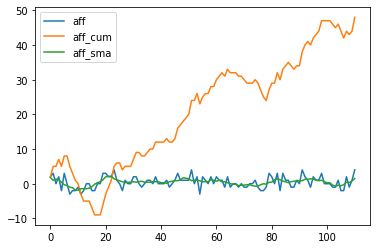

In [17]:
# get data for affection graph
aff = get_affection_series(blocks, cumulative=False)
aff_cum = get_affection_series(blocks, cumulative=True)

# put it in a pandas DataFrame
df = pd.DataFrame(zip(aff.transpose(), aff_cum.transpose()), columns=['aff', 'aff_cum'])

# calculate sliding average
df['aff_sma'] = df.aff.rolling(window=7, center=True, min_periods=1).mean()

df.plot()
plt.show()

In [18]:
# the DataFrame looks like this
df

,aff,aff_cum,aff_sma
0,2,2,1.750000
1,3,5,1.000000
2,0,5,1.333333
3,2,7,1.142857
4,-2,5,0.428571
...,...,...,...
106,-2,42,-0.285714
107,2,44,0.428571
108,-1,43,0.333333
109,1,44,0.800000


## The Analyzer Function
Takes as arguments the text `url`, desired `group_size` and sliding average window size `sma_window`.

Returns a `DataFrame` as above, with affection status, cumulative affection and averaged affection score, for plotting the graphs.

In [19]:
def affection_analysis(url, group_size=10, sma_window=7):
    text = load_text(url)
    tokens = tokenize_text(text)
    ctokens = filter_stopwords(tokens)
    ltokens = lemmatize_tokens(ctokens)
    blocks = group_tokens(ltokens, group_size)
    aff = get_affection_series(blocks, cumulative=False)
    aff_cum = aff.cumsum()
    df = pd.DataFrame(zip(aff.transpose(), aff_cum.transpose()), columns=['aff', 'aff_cum'])
    df['aff_sma'] = df.aff.rolling(window=sma_window, center=True, min_periods=1).mean()
    return df

## Plot Inaugural Speeches
We process the data for all the inaugural speeches into `speech_analyses` dict for experimentation.

In [20]:
%%time
# calculate affection curves for every inaugural speech
speech_analyses = {}
for key, filename in speeches.items():
    df = affection_analysis(urljoin(base_url, filename))
    speech_analyses.update({key:df})

Wall time: 2min 58s


That didn't take long. Let's compare Obama's and Trump's speeches:

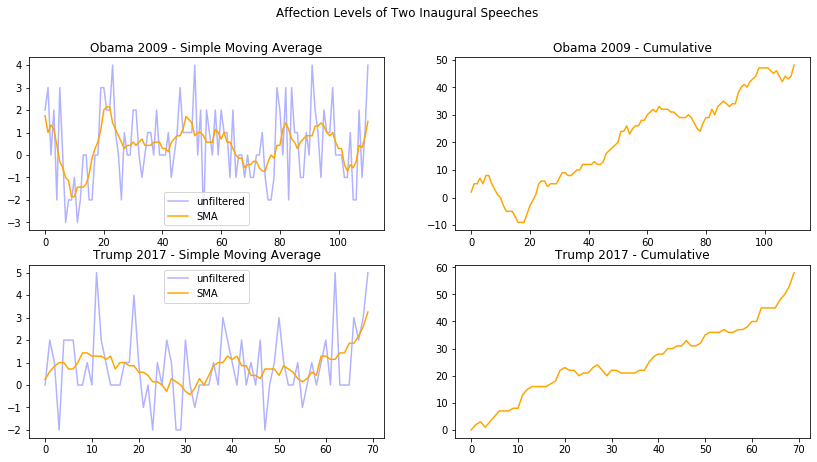

In [21]:
plt.figure(figsize=(14,7))
plt.suptitle("Affection Levels of Two Inaugural Speeches")

plt.subplot(2, 2, 1)
plt.title('Obama 2009 - Simple Moving Average')
plt.plot(speech_analyses['obama']['aff'], label='unfiltered', color='blue', alpha=0.3)
plt.plot(speech_analyses['obama']['aff_sma'], label='SMA', color='orange')
plt.legend()

plt.subplot(2, 2, 2)
plt.title('Obama 2009 - Cumulative')
plt.plot(speech_analyses['obama']['aff_cum'], color='orange')

plt.subplot(2, 2, 3)
plt.title('Trump 2017 - Simple Moving Average')
plt.plot(speech_analyses['trump']['aff'], label='unfiltered', color='blue', alpha=0.3)
plt.plot(speech_analyses['trump']['aff_sma'], label='SMA', color='orange')
plt.legend()

plt.subplot(2, 2, 4)
plt.title('Trump 2017 - Cumulative')
plt.plot(speech_analyses['trump']['aff_cum'], color='orange')

plt.show()

Looks like Trump is a bit more liberal in his use of positive words. Both presidents end their speech on a positive note.

## Novels
Let's try analyzing a couple of novels from _[Project Gutenberg](https://www.gutenberg.org)_. We use a bit larger window size for averaging, as the texts are longer. This gives us a less noisy graph. Block size is also increased to speed up processing.

In [22]:
%%time
# The Undying Fire: A contemporary novel by H. G. Wells
url_wells = 'https://www.gutenberg.org/files/61547/61547-0.txt'
wells = affection_analysis(url_wells, group_size=40, sma_window=50)

Wall time: 1min 6s


In [23]:
%%time
# The Letters of Jane Austen by Jane Austen
url_austen = 'https://www.gutenberg.org/ebooks/42078.txt.utf-8'
austen = affection_analysis(url_austen, group_size=40, sma_window=50)

Wall time: 2min 34s


Let's plot Wells' novel:

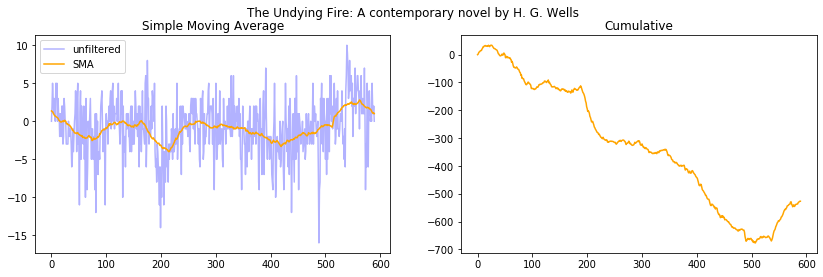

In [24]:
plt.figure(figsize=(14,4))
plt.suptitle("The Undying Fire: A contemporary novel by H. G. Wells")

plt.subplot(1, 2, 1)
plt.title('Simple Moving Average')
plt.plot(wells['aff'], label='unfiltered', color='blue', alpha=0.3)
plt.plot(wells['aff_sma'], label='SMA', color='orange')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Cumulative')
plt.plot(wells['aff_cum'], color='orange')

plt.show()

Scores mostly on the negative side, but seems to end on a more positive note.

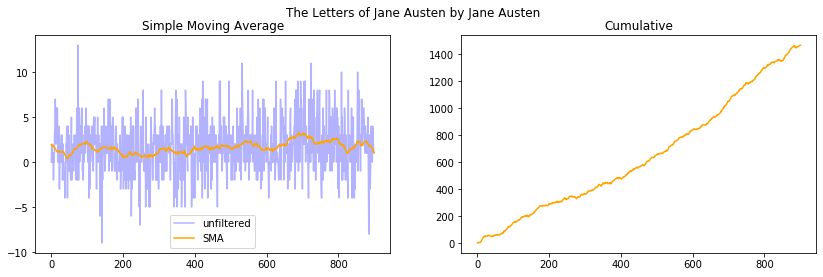

In [25]:
plt.figure(figsize=(14,4))
plt.suptitle("The Letters of Jane Austen by Jane Austen")

plt.subplot(1, 2, 1)
plt.title('Simple Moving Average')
plt.plot(austen['aff'], label='unfiltered', color='blue', alpha=0.3)
plt.plot(austen['aff_sma'], label='SMA', color='orange')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Cumulative')
plt.plot(austen['aff_cum'], color='orange')

plt.show()

Austen's novel has a steadily positive vibe.